In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [16]:
necessary_vars = ['occ_date', 'case_type_pubtrans', 'LocationCode', 'municipality', 'hate_crime', 'occ_type']

In [17]:
historical_community_safety_data_df = pd.read_csv('../../Other_Data/Historical_Community_Safety_Data.csv', usecols=necessary_vars)
print(historical_community_safety_data_df.shape)
historical_community_safety_data_df.head()

(176974, 6)


,occ_date,case_type_pubtrans,LocationCode,municipality,hate_crime,occ_type
0,2016/01/01 06:03:00+00,Impaired Alcohol / Over 80 Mgs,Outdoor,Newmarket,NaN,Impaired Operation
1,2016/01/01 06:21:59+00,Liquor - Intoxicated,Business,Markham,NaN,Provincial Offences
2,2016/01/01 06:14:59+00,Theft Under $5000 - Vehicle,Outdoor,Georgina,NaN,Theft of Motor Vehicle
3,2016/01/01 14:23:00+00,Assault with a Weapon,Business,Vaughan,Hate Crime,Assaults
4,2016/01/01 18:07:00+00,Mischief To Property,Residence,Vaughan,NaN,Mischief


In [18]:
latest_community_safety_data_df = pd.read_csv('../../Other_Data/Year_to_Date_Community_Safety_Data.csv', usecols=necessary_vars)
print(latest_community_safety_data_df.shape)
latest_community_safety_data_df.head()

(99566, 6)


,occ_date,case_type_pubtrans,LocationCode,municipality,hate_crime,occ_type
0,2021/01/01 09:00:00+00,Utter Threats To Person,NaN,Newmarket,NaN,Other Persons Crime
1,2021/01/01 09:00:00+00,Assault Peace Officer - Other,NaN,Newmarket,NaN,Assaults
2,2021/01/01 23:15:00+00,Theft Under $5000 - Shoplifting,Business,Vaughan,NaN,Theft Under $5000
3,2021/01/02 01:49:00+00,Assault,Outdoor,Vaughan,NaN,Assaults
4,2021/01/01 14:28:00+00,Impaired Alcohol / Over 80 Mgs,Outdoor,Markham,NaN,Impaired Operation


In [21]:
# Combine both historical and latest data scoures
community_safety_data_df = pd.concat([historical_community_safety_data_df, latest_community_safety_data_df]).sort_values('occ_date')
print(community_safety_data_df.shape)
community_safety_data_df.head()

(276540, 6)


,occ_date,case_type_pubtrans,LocationCode,municipality,hate_crime,occ_type
41140,2016/01/01 05:00:00+00,Public Morals,Outdoor,Whitchurch-Stouffville,NaN,Public Morals
168654,2016/01/01 05:00:00+00,Fraud - Other Means,Residence,East Gwillimbury,NaN,Fraud
170432,2016/01/01 05:00:00+00,Sexual Assault,Business,Markham,NaN,Sexual Violations
174801,2016/01/01 05:00:00+00,Other Persons Crime,Residence,East Gwillimbury,NaN,Other Persons Crime
175180,2016/01/01 05:00:00+00,Other Persons Crime,Residence,Vaughan,NaN,Other Persons Crime


In [22]:
# Convert the 'occ_date' column from timestamp format to date
community_safety_data_df['date'] = pd.to_datetime(community_safety_data_df['occ_date']).dt.date
community_safety_data_df

,occ_date,case_type_pubtrans,LocationCode,municipality,hate_crime,occ_type,date
41140,2016/01/01 05:00:00+00,Public Morals,Outdoor,Whitchurch-Stouffville,NaN,Public Morals,2016-01-01
168654,2016/01/01 05:00:00+00,Fraud - Other Means,Residence,East Gwillimbury,NaN,Fraud,2016-01-01
170432,2016/01/01 05:00:00+00,Sexual Assault,Business,Markham,NaN,Sexual Violations,2016-01-01
174801,2016/01/01 05:00:00+00,Other Persons Crime,Residence,East Gwillimbury,NaN,Other Persons Crime,2016-01-01
175180,2016/01/01 05:00:00+00,Other Persons Crime,Residence,Vaughan,NaN,Other Persons Crime,2016-01-01
...,...,...,...,...,...,...,...
99428,2023/07/01 11:28:00+00,Missing Person-Adult,Residence,Markham,NaN,Missing Person,2023-07-01
99493,2023/07/01 17:19:59+00,Possession Under - Property Obtained By Crime,Outdoor,Markham,NaN,Other Property Crime,2023-07-01
99488,2023/07/01 19:34:00+00,Impaired Alcohol / Over 80 Mgs,Outdoor,East Gwillimbury,NaN,Impaired Operation,2023-07-01
99561,2023/07/01 19:34:00+00,Impaired Operation Alcohol And Drug,Outdoor,East Gwillimbury,NaN,Impaired Operation,2023-07-01


In [38]:
# Get number of occurances each day
timeseries_data_df = community_safety_data_df.groupby('date').size().reset_index(name='num_of_crimes')
timeseries_data_df

,date,num_of_crimes
0,2016-01-01,270
1,2016-01-02,69
2,2016-01-03,77
3,2016-01-04,107
4,2016-01-05,94
...,...,...
2734,2023-06-27,70
2735,2023-06-28,61
2736,2023-06-29,53
2737,2023-06-30,35


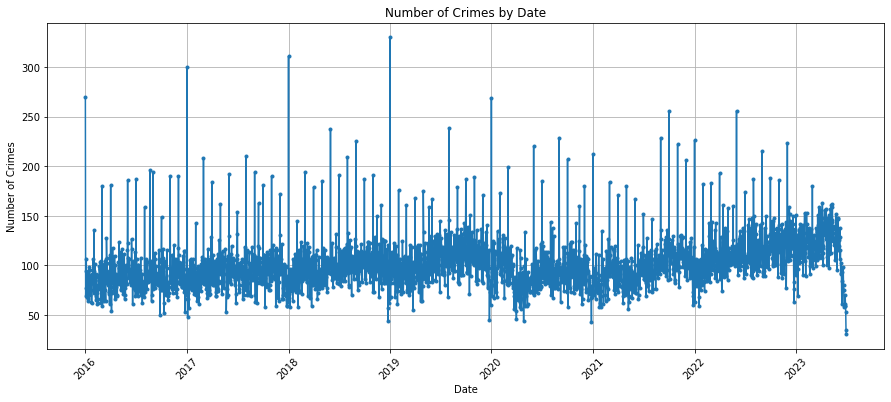

In [35]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(timeseries_data_df['date'], timeseries_data_df['num_of_crimes'], marker='.')
plt.title('Number of Crimes by Date')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Time Series Features

In [36]:
def load_query(path):
    with open(path) as file:
        return file.read()

In [37]:
query = load_query('query.sql')
df = pysqldf(query)
df

PandaSQLException: (sqlite3.OperationalError) no such column: number
[SQL: WITH distinct_orders AS (
	SELECT DISTINCT
		number,
		DATE(date) AS date
	FROM timeseries_data_df
),

weekly_orders AS (
	SELECT 
		DATE(date, '-7 DAYS', 'WEEKDAY 1') AS week,
		COUNT(*) AS num_orders 
	FROM distinct_orders
	GROUP BY 1
),

recent_7_day_orders AS (
	SELECT 
		orders.week,
		COUNT(recent_orders.number) AS order_count
	FROM weekly_orders orders
	JOIN distinct_orders recent_orders
		ON recent_orders.date < orders.week
		AND recent_orders.date >= DATE(orders.week, '-7 DAYS') 
	GROUP BY 1
),

recent_30_day_orders AS (
	SELECT 
		orders.week,
		COUNT(recent_orders.number) AS order_count
	FROM weekly_orders orders
	JOIN distinct_orders recent_orders
		ON recent_orders.date < orders.week
		AND recent_orders.date >= DATE(orders.week, '-30 DAYS') 
	GROUP BY 1
),

labels AS (
	SELECT 
		orders.week,
		COUNT(label_orders.number) AS order_count
	FROM weekly_orders orders
	JOIN distinct_orders label_orders
		ON label_orders.date >= orders.week
		AND label_orders.date < DATE(orders.week, '7 DAYS') 
	GROUP BY 1
)

SELECT
	orders.week,
	COALESCE(recent_7_day_orders.order_count, 0) AS order_count_7_day,
	COALESCE(recent_30_day_orders.order_count, 0) AS order_count_30_day,
	COALESCE(labels.order_count, 0) AS label
FROM weekly_orders orders
LEFT JOIN recent_7_day_orders
	ON recent_7_day_orders.week = orders.week
LEFT JOIN recent_30_day_orders
	ON recent_30_day_orders.week = orders.week
LEFT JOIN labels
	ON labels.week = orders.week
WHERE orders.week >= '2016-01-01'
]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [ ]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(community_safety_data_df, label='PJME_MW')
features_and_target = pd.concat([X, y], axis=1)